<div align="center"> <h1>Изучение генерации разностной частоты при $\delta_i = 0$</h1></div>

In [2]:
# imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.integrate import odeint
from scipy.signal import argrelextrema

sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 14})

Период перекачки энергии X: 1.321
Период перекачки энергии Z: 2.643
Коэффициент преобразования мощности max: 0.5


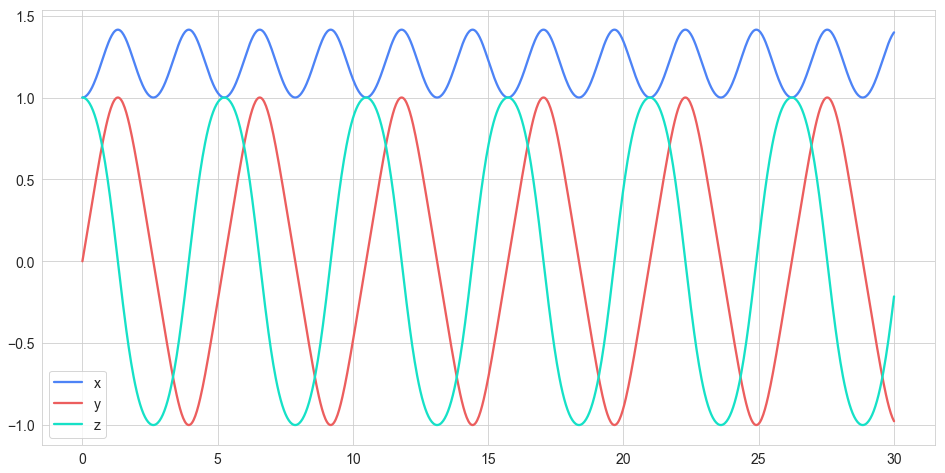

In [3]:
# system of differential equations (SDE)
def model(r, t):
    x = r[0]
    y = r[1]
    z = r[2]
    
    dxdt = y * z - delta * x
    dydt = x * z - delta * y
    dzdt = -x * y - delta * z
    drdt = [dxdt, dydt, dzdt]
    return drdt


# initial conditions
r0 = [1, 0, 1]
delta = 0.0

# params
t = np.linspace(0, 30, 1000)

# solve ODE
r = odeint(model, r0, t)

# plotting graphs
plt.figure(figsize = (16, 8))
plt.plot(t, r[:,0], color = '#4d83f6', lw = 2.3, label = 'x')
plt.plot(t, r[:,1], color = '#ec5e5e', lw = 2.3, label = 'y')
plt.plot(t, r[:,2], color = '#16e1c7', lw = 2.3, label = 'z')
plt.legend()

# find locals maxima and minima
xmax = argrelextrema(r[:,0], np.greater)
ymax = argrelextrema(r[:,1], np.greater)
zmax = argrelextrema(r[:,2], np.greater)

xmin = argrelextrema(r[:,0], np.less)
ymin = argrelextrema(r[:,1], np.less)
zmin = argrelextrema(r[:,2], np.less)

# calculate and print
print("Период перекачки энергии X: %.3f" % (t[xmax][0]))
print("Период перекачки энергии Z: %.3f" % (t[zmax][0] - t[zmin][0]))
print("Коэффициент преобразования мощности max: %.1f" % (np.max(r[:,1])**2/(np.max(r[:,0])**2)))